In [1]:
# !pip3 --version
#!pip install --upgrade pip

# python --version
# !pip install autocorrect

In [2]:
#imports 
import re
import pandas as pd
import os
import glob
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
sns.set_style('darkgrid')
from collections import Counter
from autocorrect import Speller


import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
from io import StringIO
%matplotlib inline
import missingno as msno
import category_encoders as ce
import folium
from folium import Choropleth
#from folium.plugins import MarkerCluster
#from folium import plugins
from IPython.display import display
#from shapely import wkt


In [3]:
#!pip list

In [4]:

#to load all the sheets present in the xslx file 
# Path to the Excel file
file_path = '/Users/salu/Downloads/QVI_transaction_data.xlsx'

# Load the Excel file object
xls = pd.ExcelFile(file_path)

# Print all sheet names
print(xls.sheet_names)


['in']


In [5]:
# directory path for transaction file
directory_path_transaction = '/Users/salu/Downloads/' 
# pandas dataframe 
transaction_df =pd.read_excel(directory_path_transaction + 'QVI_transaction_data.xlsx')

In [6]:
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [7]:
# directory path for purchase behaviour 
directory_path_purchase = '/Users/salu/Downloads/' 
# pandas dataframe 
purchase_behav_df =pd.read_csv(directory_path_transaction + 'QVI_purchase_behaviour.csv')


In [8]:
purchase_behav_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


# **Transaction Data**

In [9]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [10]:
transaction_df.shape

(264836, 8)

In [11]:
# transaction_df.describe()

In [12]:
transaction_df.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [13]:
transaction_df.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [14]:
transaction_df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [15]:
transaction_df.tail(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264826,43549,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264827,43340,272,272197,269911,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6
264828,43308,272,272236,269974,68,Pringles Chicken Salt Crips 134g,2,7.4
264829,43540,272,272236,269976,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6
264830,43416,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [16]:
transaction_df1 = transaction_df.copy()


In [17]:
print(transaction_df1.dtypes)

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [18]:
# the format of date needs to be changed in the dataframe 
# The number 43549 means the number of days since January 1, 1900 (Excel’s base date system on Windows)
transaction_df1['DATE'] = pd.to_datetime(transaction_df1['DATE'], origin='1899-12-30', unit='D')



In [19]:
transaction_df1.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [20]:
transaction_df1.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,2018-09-22,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [21]:
transaction_df1['PROD_NAME'].nunique()

114

In [22]:
product_name = transaction_df1['PROD_NAME'].unique()

In [23]:
product_name

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [24]:
# product_name_corrected = [map(spell, l) for l in product_name]


In [25]:
# print(product_name_corrected)

In [26]:
# splitting each string in the prod_name column to identify the products other than chips 
# 2. Split into individual words
all_words = []
for name in product_name:
    words = name.split()
    # remove digits and special characters , using regular expression and is placed into all_words
    clean_words = [w.lower() for w in words if re.match(r'^[a-zA-Z]+$', w)]
    all_words.extend(clean_words)

# 3. Count word frequencies
word_freq = Counter(all_words)

# 4. View most common words
print(word_freq.most_common(20))

[('chips', 21), ('smiths', 16), ('crinkle', 14), ('cut', 14), ('kettle', 13), ('cheese', 12), ('salt', 12), ('original', 10), ('chip', 9), ('salsa', 9), ('doritos', 9), ('corn', 8), ('pringles', 8), ('rrd', 8), ('chicken', 7), ('ww', 7), ('sour', 6), ('sea', 6), ('thinly', 5), ('vinegar', 5)]


In [27]:
type(all_words)

list

In [28]:
if "doritos" in all_words:
    print(all_words.count('doritos'))



9


In [29]:
nonchip_words = []
for word in all_words:
    if "chutney" in word:
        nonchip_words.append(word)
print(nonchip_words)

[]


In [30]:
# type(product_name) set the column name to avoid confusion

In [31]:
# pd.set_option("display.max_rows", None)
# product_name

In [32]:
non_chip_terms = ["salsa", "dip", "chutney", "papadums", "aioli", "spread", "jam", "puffs"]
chip_terms = ["chips", "chip", "cut","crinkle cut", "pringles", "pringle", "crisps", "chps", "tortilla"] 
# dorito also has dips having them in chip terms too might be contradictory

In [33]:
# import pandas as pd
# import re

def filter_non_chip_products(df, product_col, chip_words, non_chip_words):
    """
    Removes rows where only non-chip keywords are present.
    Keeps rows that have chip keywords, or no non-chip keywords at all.
    
    Args:
        df (pd.DataFrame): The DataFrame containing product names.
        product_col (str): The column name with product names.
        chip_words (list): List of keywords that confirm a chip.
        non_chip_words (list): List of keywords that suggest non-chip products.
    
    Returns:
        pd.DataFrame: Cleaned DataFrame with non-chip-only rows removed.
    """
    product_name_df = transaction_df1.copy()
    product_name_df["__name_lower"] = transaction_df1['PROD_NAME'].str.lower()
    
    chip_pattern = "|".join(map(re.escape, chip_terms))
    non_chip_pattern = "|".join(map(re.escape, non_chip_terms))

    has_chip = df["__name_lower"].str.contains(chip_pattern, regex=True)
    has_non_chip = df["__name_lower"].str.contains(non_chip_pattern, regex=True)

    # Keep rows that either have no non-chip keywords, or also contain chip keywords
    keep_mask = ~has_non_chip | has_chip
    cleaned_df = df[keep_mask].drop(columns="__name_lower")
    return cleaned_df


In [34]:
# product_name_df = product_name.copy()
product_name_df = transaction_df1.copy()
product_name_df["__name_lower"] = transaction_df1['PROD_NAME'].str.lower()
# product_name_df

In [35]:
product_name_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,__name_lower
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,natural chip compny seasalt175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,ccs nacho cheese 175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,smiths crinkle cut chips chicken 170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,smiths chip thinly s/cream&onion 175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,kettle tortilla chpshny&jlpno chili 150g
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,kettle sweet chilli and sour cream 175g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,tostitos splash of lime 175g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,doritos mexicana 170g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,doritos corn chip mexican jalapeno 150g


In [36]:
filtered_df = filter_non_chip_products(product_name_df,product_name_df["__name_lower"],chip_terms,non_chip_terms)

In [37]:
filtered_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [38]:
filtered_df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai  C

In [42]:
removed_names = set(transaction_df1["PROD_NAME"]) - set(filtered_df["PROD_NAME"])
print(len(removed_names))  # How many unique names were eliminated
print(removed_names)       # What those names are


12
{'Red Rock Deli Chikn&Garlic Aioli 150g', 'Doritos Salsa Mild  300g', 'Woolworths Medium   Salsa 300g', 'Doritos Salsa       Medium 300g', 'Old El Paso Salsa   Dip Tomato Med 300g', 'Cheetos Puffs 165g', 'Red Rock Deli SR    Salsa & Mzzrlla 150g', 'Woolworths Mild     Salsa 300g', 'Infuzions Mango     Chutny Papadums 70g', 'Old El Paso Salsa   Dip Tomato Mild 300g', 'GrnWves Plus Btroot & Chilli Jam 180g', 'Old El Paso Salsa   Dip Chnky Tom Ht300g'}


In [45]:
filtered_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,242355,242355.000000,2.423550e+05,2.423550e+05,242355.000000,242355.000000,242355.000000
mean,2018-12-30 01:05:11.538032896,135.028561,1.355144e+05,1.351092e+05,56.006292,1.908246,7.357801
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.000200e+04,6.749150e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303680e+05,1.351870e+05,52.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030795e+05,2.026335e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.804248,8.080098e+04,7.816961e+04,33.847429,0.663670,3.089241


<Axes: >

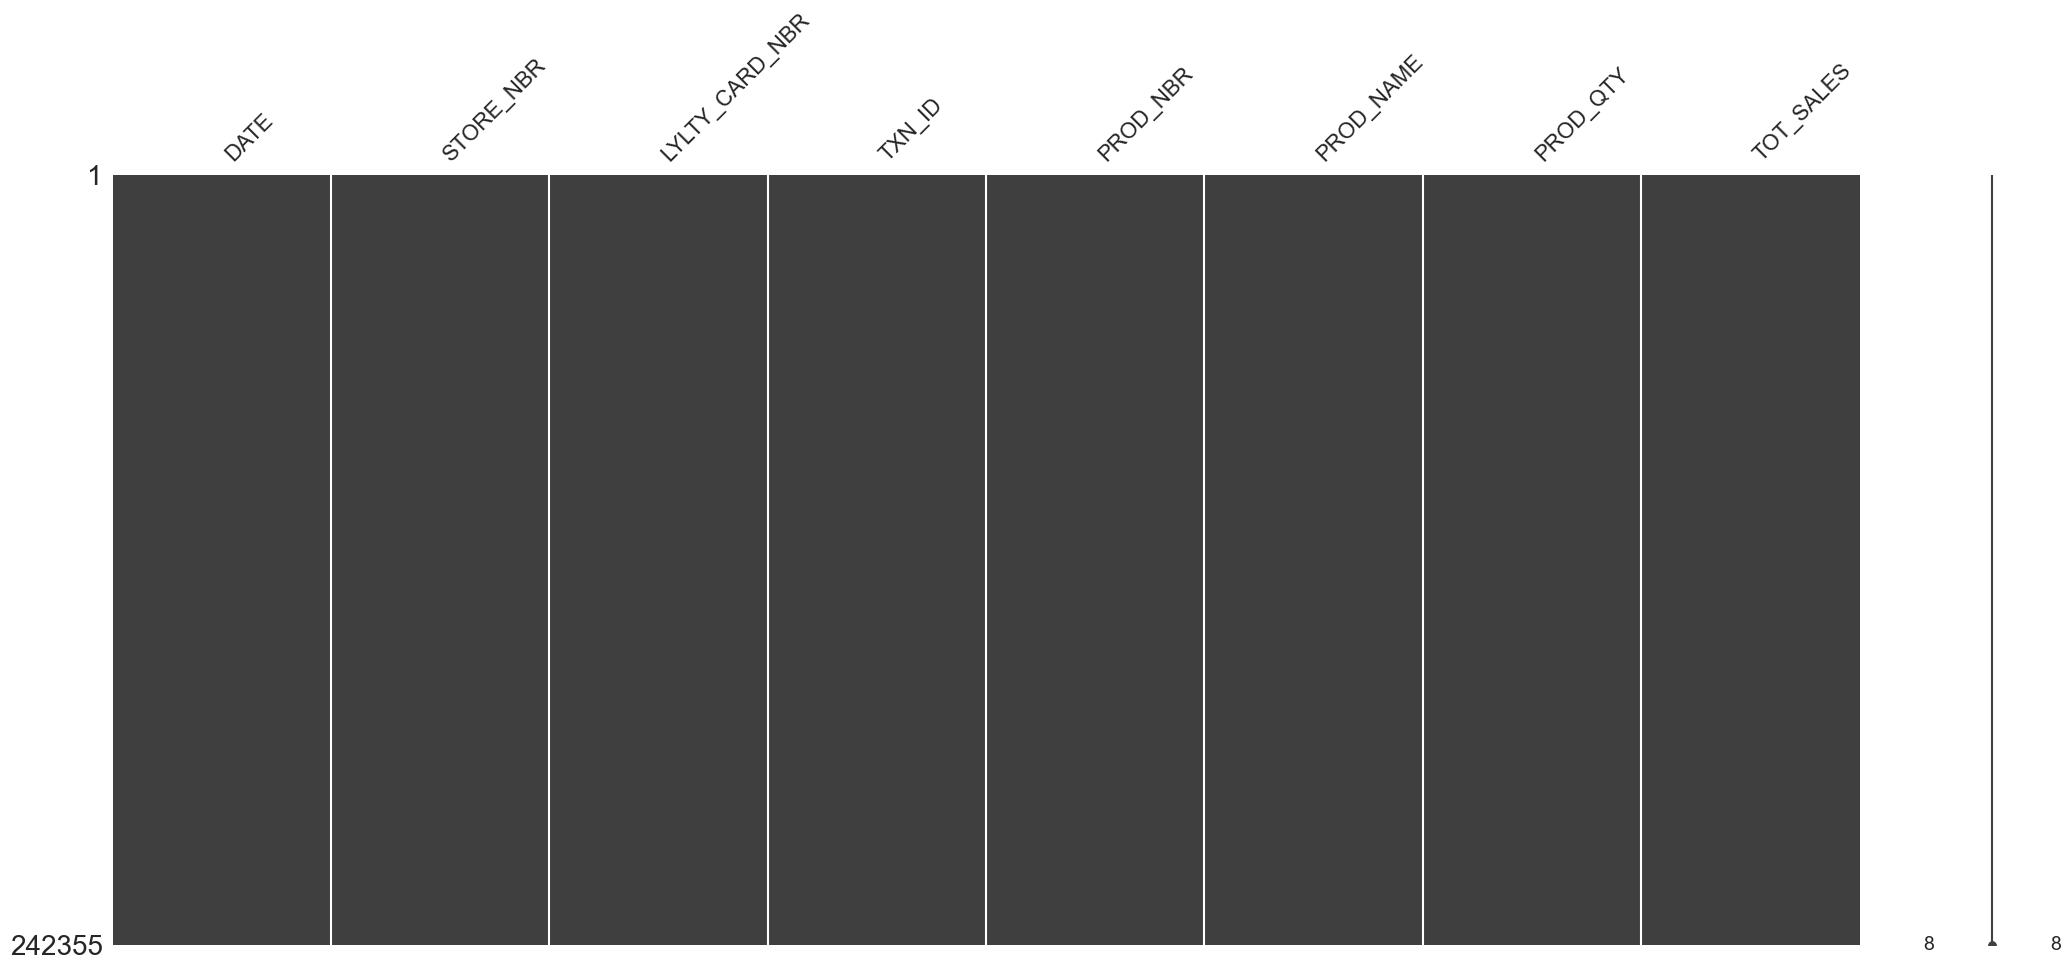

In [46]:
#visualizing the missing values
msno.matrix(filtered_df) #no nulls 

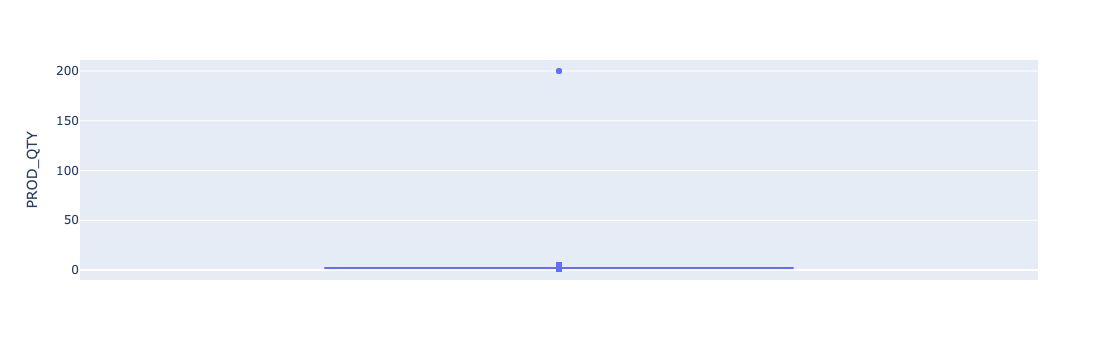

In [49]:
#check for outliers 
fig = px.box(filtered_df, y="PROD_QTY")
fig